[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/PhanTung-06/CS114.L21/blob/main/LinearRegression_ML.ipynb

# Dead 26.04.2021


# Import Libraries and Read Data

In [1]:
%cd /content/drive/MyDrive/CS114/26.04

/content/drive/MyDrive/CS114/26.04


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [8]:
# Read data
df = pd.read_csv('data2.csv',names=['Size','Time'])
test = pd.read_csv('data3.csv',names=['Size','Time'])

In [9]:
df.head(5)

,Size,Time
0,6083695,0.521842
1,1954367,0.152648
2,3734185,0.298548
3,5839301,0.460480
4,6343427,0.527977


In [32]:
test.head(5)

,Size,Time
0,37837612,4.12166
1,37395246,3.92089
2,36610827,3.21540
3,29555651,2.54506
4,25928216,2.21831


# Method 1 with mse = 0.02


In [24]:
data = np.array(df)
x_train = data[:,0].reshape(-1,1)
y_train = data[:,1].reshape(-1,1)

In [46]:
test = np.array(test)
x_test = test[:,0].reshape(-1,1)
y_test = test[:,1].reshape(-1,1)

In [54]:
from sklearn.linear_model import LinearRegression


In [55]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
predictions = model.predict(x_test)

In [57]:
from sklearn import metrics

In [58]:
mse = metrics.mean_squared_error(y_test, predictions)
print(mse)

0.020664949397549082


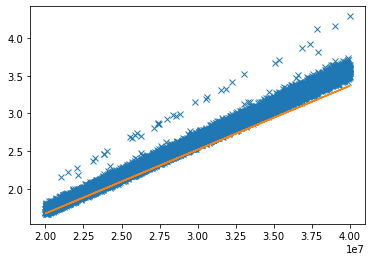

In [59]:
plt.plot(x_test,y_test,"x")
plt.plot(x_test,predictions)
plt.show()


In [60]:
print('test: ',y_test)
print('predict: ',predictions)

test:  [[4.12166]
 [3.92089]
 [3.2154 ]
 ...
 [2.90918]
 [1.80292]
 [1.82795]]
predict:  [[3.18353889]
 [3.14613375]
 [3.07980564]
 ...
 [2.81848194]
 [1.78037084]
 [1.79197375]]


#Method 2 with processing data mse = 0.00375

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
scale = StandardScaler()
scaledX = scale.fit_transform(x_train)
scaledX_test = scale.transform(x_test)

In [79]:
model = linear_model.Ridge(alpha = -4000).fit(scaledX, y_train)

In [80]:
predictions = reg_predict.predict(scaledX_test)

In [81]:
mse = metrics.mean_squared_error(y_test, predictions)
print('mse: ',mse)

mse:  0.0037502328399061286


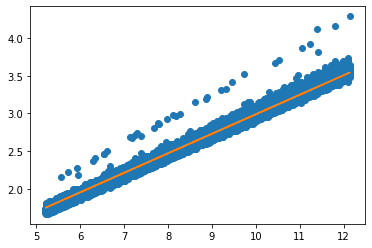

In [82]:
plt.plot(scaledX_test,y_test,"o")
plt.plot(scaledX_test,predictions)
plt.show()